# <u>ML Project</u>
### <u>Team ID</u> : 7<br><u>Team Name</u> : TREXTRON 
### <u>Project ID</u> :  7<br><u>Project Topic</u> : Airfoil noise
###  <u>Algorithm</u> : *Random Forest* <br><u>To predict</u> : *last variable*<br><u>Type of problem</u> : *Regression*

## Importing libraries

In [1]:
# importing libraries and other necessities

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

# Importing the Data from .xlsx file

In [2]:
# importing datasets
data = pd.read_excel('Air-foil-noise.xlsx')

# this is the same dataset, but I will be using it for vizualizing the results
viz=pd.read_excel('Air-foil-noise.xlsx')

## Data Pre-Processing

In [3]:
# checking for null and printing the count of null values present in each column
print(data.isna().sum())

# As there is data of multiple data types, 
# include the datatypes required to be considered when the values are taken from the dataset.
factors = data.select_dtypes(include=['int64', 'float64','bool']).columns.values

# Using this you can select all the values from the dataset other than the last column to which we have to predict values.
factors = factors[factors!=['Scaled sound pressure']]

#Extracting Independent and dependent Variable  
x = data[ factors ].values
y = data['Scaled sound pressure'].values

Frequency                    0
Angle of attack              0
Chord length                 0
Free stream velocity         0
Suction side displacement    0
Scaled sound pressure        0
dtype: int64


### Observing the data set values to get a clear idea on what we are working on

In [4]:
data.head()

,Frequency,Angle of attack,Chord length,Free stream velocity,Suction side displacement,Scaled sound pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
data.describe()

,Frequency,Angle of attack,Chord length,Free stream velocity,Suction side displacement,Scaled sound pressure
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


## Splitting data for training and testing

In [6]:
# Splitting the dataset into training and test set.  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

print("Train:", x_train.shape, y_train.shape)
print("Test:", x_test.shape, y_test.shape)

Train: (1052, 5) (1052,)
Test: (451, 5) (451,)


## Fitting Random Forest algorithm to the training set and Predicting test result

In [7]:
#Fitting Decision Tree Regressor to the training set  
model = RandomForestRegressor(n_estimators= 1000, random_state=100)
model.fit(x_train, y_train)

#Predicting the test set result  
y_pred = model.predict(x_test)



## The final predicted array that is obtain form the above model

In [8]:
y_pred

array([118.895647, 116.541777, 125.06494 , 123.883829, 132.383393,
       128.613679, 133.712761, 129.622783, 114.906889, 129.640843,
       121.563535, 127.094798, 124.382143, 128.641341, 110.046812,
       123.880225, 117.989386, 124.420606, 132.368212, 125.262708,
       133.592652, 119.623336, 115.466235, 126.605435, 127.716961,
       123.126861, 130.709309, 125.584077, 129.411207, 129.500257,
       125.172234, 125.191151, 128.109312, 130.712655, 125.978832,
       131.389648, 124.448788, 126.442235, 128.709302, 133.861733,
       125.631088, 127.846358, 128.328304, 124.823368, 129.161515,
       126.51922 , 124.442292, 127.817042, 120.181738, 123.953113,
       122.93448 , 132.329388, 130.993512, 122.44165 , 135.524215,
       115.438995, 128.090846, 122.704338, 114.816083, 134.285868,
       122.850577, 113.2947  , 130.979761, 119.487744, 130.993104,
       127.979327, 120.779857, 120.258992, 129.5683  , 122.350608,
       126.902038, 111.301926, 126.152496, 130.958335, 132.434

## Checking for errors and other metrics

In [9]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.3121571064301283
Mean Squared Error: 3.2135365446892563
Root Mean Squared Error: 1.7926339684077328


## Calculating the accuracy of the prediction
*As I was going for the accuracy in a regression model I tried to make an aproach with calculating errors and subtract the **mean absolute percentage error** from 100% to the actually accuracy of the model.*

In [10]:
# Gettign the absolute error value by seeing the variation in y_test and y_pred
errors = abs(y_pred - y_test)
# print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.94 %.


## Visualizing the Test Set result using various plots
### visualization using scatter plot to check the accuracy between the actual and predicted values

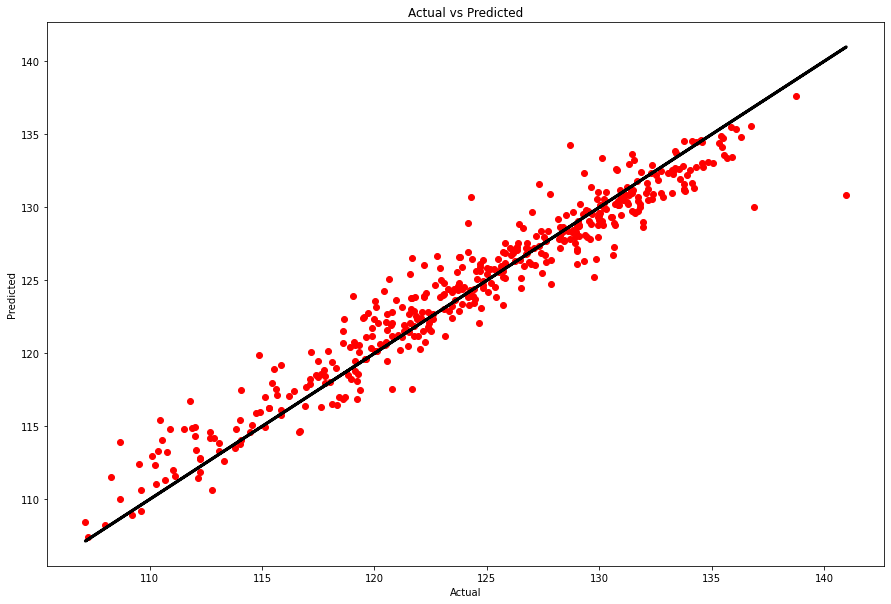

In [11]:

plt.figure(figsize=(15, 10))
plt.scatter(y_test, y_pred, color='red')
plt.plot(y_test, y_test, color='black', linewidth='3')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

plt.show()

### Using count plot to vizualize the column's values

Text(0.5, 0.98, 'Columns Data Values')

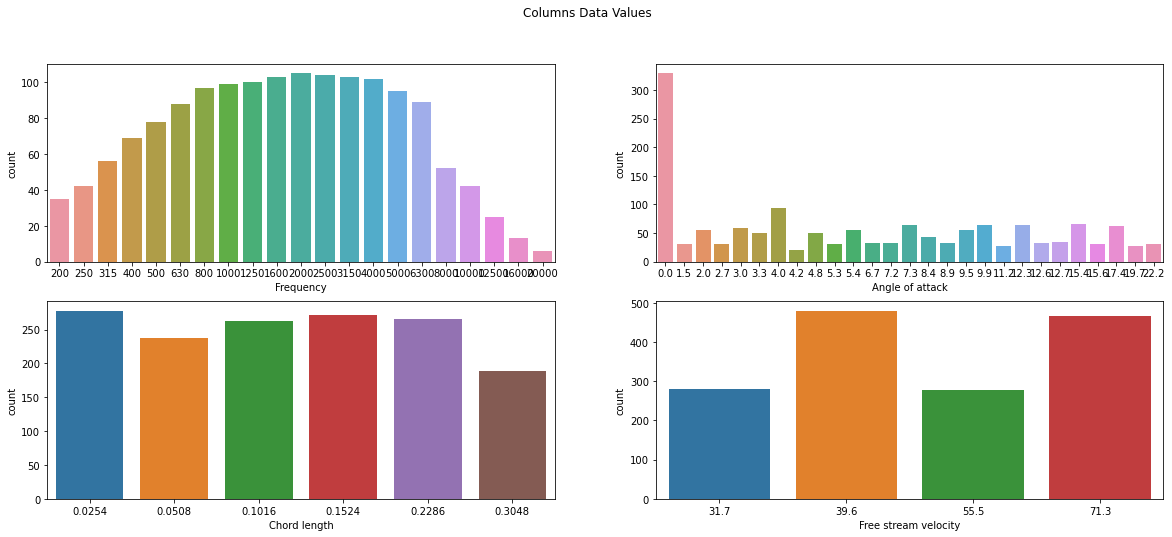

In [12]:

plt.figure(figsize = (20, 8))

plt.subplot(2, 2, 1)
sns.countplot(x=viz['Frequency'])

plt.subplot(2, 2, 2)
sns.countplot(x=viz['Angle of attack'])

plt.subplot(2, 2, 3)
sns.countplot(x=viz['Chord length'])

plt.subplot(2, 2, 4)
sns.countplot(x=viz['Free stream velocity'])

plt.suptitle('Columns Data Values')

### Using Stipplot to visualize y_test and y_pred as Categorical scatterplots

<AxesSubplot:>

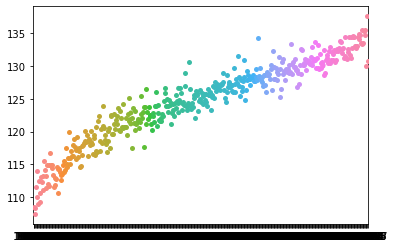

In [13]:
sns.stripplot(x = y_test, y = y_pred)

### Using Pairplot to finally display the relationship of data between each column and row in the dataset

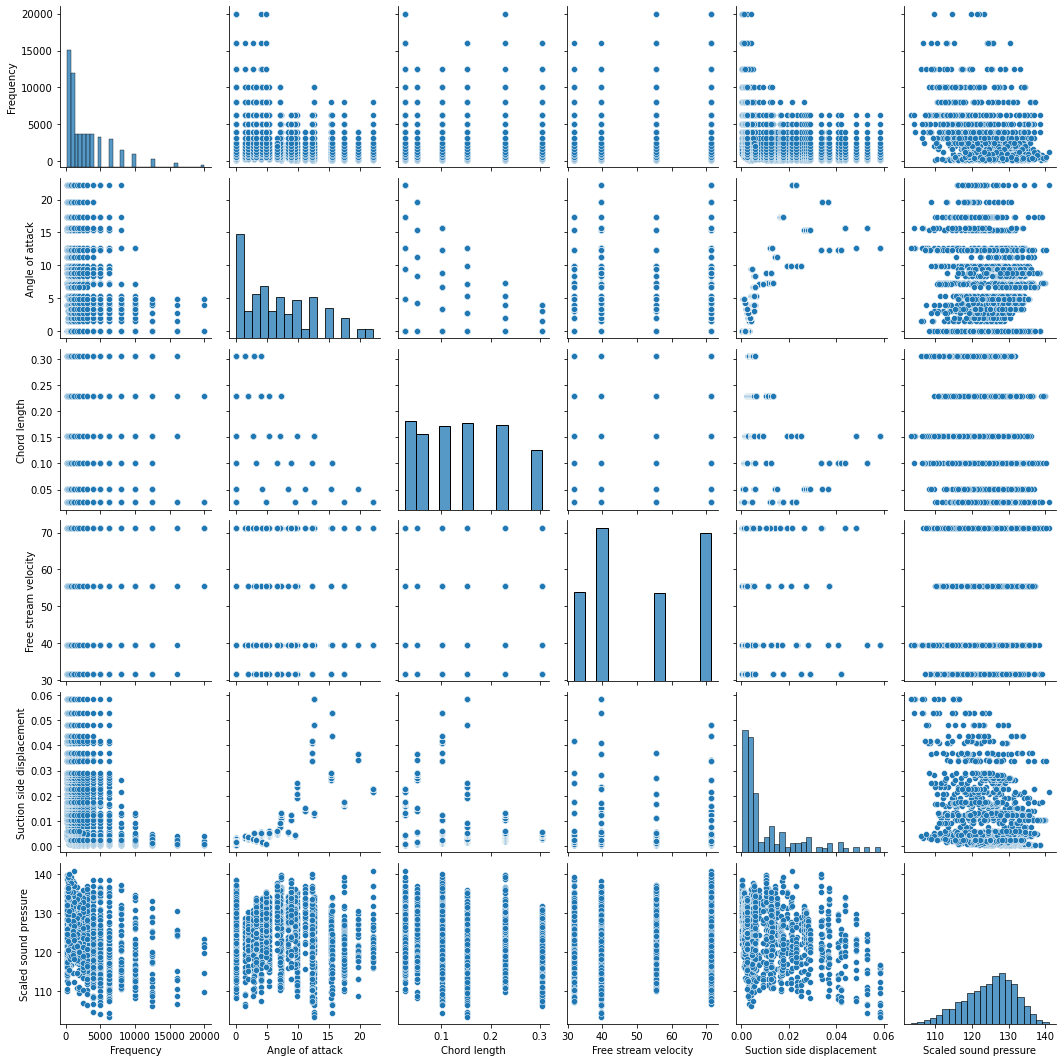

In [14]:
sns.pairplot(viz)